In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline
sns.set()

In [81]:
import itertools

match_results = pd.DataFrame(columns=[i for i in range(1, 7)])

for element in itertools.product(['k', 'j', 'rjk'], 
                                 ['p', 's', 'rps'],
                                 ['p', 'k', 'rpk'],
                                 ['j', 's', 'rjs'],
                                 ['p', 'j', 'rpj'],
                                 ['k', 's', 'rks']):
    x = pd.DataFrame([element], columns=[i for i in range(1, 7)])
    match_results = match_results.append(x)
match_results.shape

(729, 6)

In [82]:
match_results.reset_index(inplace=True, drop=True)
match_results.head(3)

,1,2,3,4,5,6
0,k,p,p,j,p,k
1,k,p,p,j,p,s
2,k,p,p,j,p,rks


In [173]:
teams = ['p', 'k', 'j', 's']

for team in teams:
    match_results[team + "_wins"] = match_results.iloc[:, :6][match_results.iloc[:, :6] == team].count(axis="columns")

In [164]:
t

,1,2,3,4,5,6,p_wins,k_wins,j_wins,s_wins
0,k,p,p,j,p,k,3,2,1,0
1,k,p,p,j,p,s,3,1,1,1
2,k,p,p,j,p,rks,3,1,1,0
3,k,p,p,j,j,k,2,2,2,0
4,k,p,p,j,j,s,2,1,2,1
5,k,p,p,j,j,rks,2,1,2,0
6,k,p,p,j,rpj,k,2,2,1,0
7,k,p,p,j,rpj,s,2,1,1,1
8,k,p,p,j,rpj,rks,2,1,1,0
9,k,p,p,s,p,k,3,2,0,1


In [156]:
def count_draws(iterable, arg):
    return sum([1 for x in iterable if arg in x and 'r' in x])

In [169]:
for team in teams:
    match_results[team + '_draws'] = match_results.iloc[:, :6].apply(count_draws, args=team, axis=1)

In [177]:
match_results.head()

,1,2,3,4,5,6,p_draws,k_draws,j_draws,s_draws,p_wins,k_wins,j_wins,s_wins
0,k,p,p,j,p,k,0,0,0,0,3,2,1,0
1,k,p,p,j,p,s,0,0,0,0,3,1,1,1
2,k,p,p,j,p,rks,0,1,0,1,3,1,1,0
3,k,p,p,j,j,k,0,0,0,0,2,2,2,0
4,k,p,p,j,j,s,0,0,0,0,2,1,2,1


In [176]:
mr = match_results.copy()

In [178]:
for team in teams:
    mr[team + '_points'] = 3 * mr[team + "_wins"] + mr[team + "_draws"]

In [179]:
mr.head()

,1,2,3,4,5,6,p_draws,k_draws,j_draws,s_draws,p_wins,k_wins,j_wins,s_wins,p_points,k_points,j_points,s_points
0,k,p,p,j,p,k,0,0,0,0,3,2,1,0,9,6,3,0
1,k,p,p,j,p,s,0,0,0,0,3,1,1,1,9,3,3,3
2,k,p,p,j,p,rks,0,1,0,1,3,1,1,0,9,4,3,1
3,k,p,p,j,j,k,0,0,0,0,2,2,2,0,6,6,6,0
4,k,p,p,j,j,s,0,0,0,0,2,1,2,1,6,3,6,3


Pomijam remisy, jeżeli drugi wynik w grupie - zawsze awansuje

In [240]:
def advanced(results_list, team):
    points = results_list[team + "_points"]
    results_sorted = results_list.values
    results_sorted.sort()
    if points in results_sorted[-2:]:
        return True 
    else: 
        return False

In [244]:
for team in teams:
    mr[team + "_advanced"] = mr[[team + "_points" for team in teams]].apply(advanced, axis=1, args=team)
    
mr.head()

,1,2,3,4,5,6,p_draws,k_draws,j_draws,s_draws,...,p_points,k_points,j_points,s_points,pl_advanced,draws,p_advanced,k_advanced,j_advanced,s_advanced
0,k,p,p,j,p,k,0,0,0,0,...,9,6,3,0,True,0,True,True,False,False
1,k,p,p,j,p,s,0,0,0,0,...,9,3,3,3,True,0,True,True,True,True
2,k,p,p,j,p,rks,0,1,0,1,...,9,4,3,1,True,2,True,True,False,False
3,k,p,p,j,j,k,0,0,0,0,...,6,6,6,0,True,0,True,True,True,False
4,k,p,p,j,j,s,0,0,0,0,...,6,3,6,3,True,0,True,False,True,False


In [235]:
mr["draws"] = mr[[team + "_draws" for team in teams]].sum(axis=1)

In [246]:
mr.drop("pl_advanced", inplace=True, axis=1)

In [250]:
mr.head()

,1,2,3,4,5,6,p_draws,k_draws,j_draws,s_draws,...,p_points,k_points,j_points,s_points,draws,p_advanced,k_advanced,j_advanced,s_advanced,advanced
0,k,p,p,j,p,k,0,0,0,0,...,9,6,3,0,0,True,True,False,False,2
1,k,p,p,j,p,s,0,0,0,0,...,9,3,3,3,0,True,True,True,True,4
2,k,p,p,j,p,rks,0,1,0,1,...,9,4,3,1,2,True,True,False,False,2
3,k,p,p,j,j,k,0,0,0,0,...,6,6,6,0,0,True,True,True,False,3
4,k,p,p,j,j,s,0,0,0,0,...,6,3,6,3,0,True,False,True,False,2


In [273]:
mr["draws"] = mr["draws"] / 2

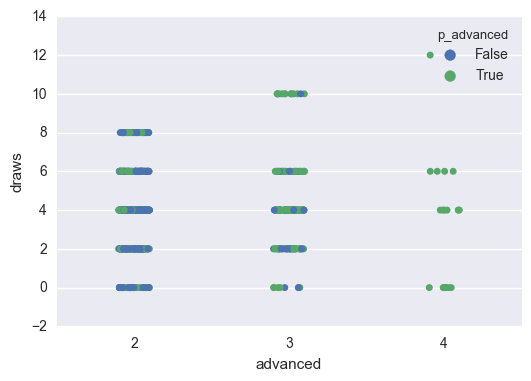

In [274]:
x = mr.groupby("p_advanced").sum().loc[:, ["p_draws", "draws"]]

In [275]:
x

,p_draws,draws
p_advanced,,
False,318,618.0
True,411,840.0


In [285]:
mr["non_p_draws"] = mr["draws"] - mr["p_draws"]

In [286]:
mr.pivot_table("p_advanced", index="p_wins", columns="non_p_draws")

non_p_draws,0.0,1.0,2.0,3.0
p_wins,,,,
0,0.0000,0.062500,0.125000,0.125
1,0.6875,0.666667,0.666667,0.750
2,1.0000,1.000000,1.000000,1.000
3,1.0000,1.000000,1.000000,1.000
